In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

In [3]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [4]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

# 파일 불러오기

In [5]:
train = pd.read_csv('../data/df_train.csv')
test = pd.read_csv('../data/df_test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

# 파일 확인

In [8]:
# d_l_match_yn : 회원 선호 속성 D 1번 대분류코드와 컨텐츠 속성 D 대분류코드가 동일한지에 대한 여부
# d_m_match_yn : 회원 선호 속성 D 1번 세분류코드와 컨텐츠 속성 D 세분류코드가 동일한지에 대한 여부
# d_s_match_yn : 회원 선호 속성 D 1번 코드와 컨텐츠 속성 D 코드가 동일한지에 대한 여부
# h_l_match_yn : 회원 선호 속성 H 1번 대분류코드와 컨텐츠 속성 H 대분류코드가 동일한지에 대한 여부
# h_m_match_yn : 회원 선호 속성 H 1번 중분류코드와 컨텐츠 속성 H 중분류코드가 동일한지에 대한 여부
# h_s_match_yn : 회원 선호 속성 H 1번 코드와 컨텐츠 속성 H 코드가 동일한지에 대한 여부

# person_attribute_a : 회원 속성 A
# person_attribute_a_1 : 회원 속성 A 하위 속성 1
# person_attribute_b : 회원 속성 B

# person_prefer_c : 회원 선호 속성 C
# person_prefer_d_1 : 회원 선호 속성 D 1번
# person_prefer_d_2 : 회원 선호 속성 D 2번
# person_prefer_d_3 : 회원 선호 속성 D 3번
# person_prefer_e : 회원 선호 속성 E
# person_prefer_f : 회원 선호 속성 F
# person_prefer_g : 회원 선호 속성 G
# person_prefer_h_1 : 회원 선호 속성 H 1번
# person_prefer_h_2 : 회원 선호 속성 H 2번
# person_prefer_h_3 : 회원 선호 속성 H 3번

# contents_attribute_i : 컨텐츠 속성 I
# contents_attribute_a : 컨텐츠 속성 A
# contents_attribute_j_1 : 컨텐츠 속성 J 하위 속성 1
# contents_attribute_j : 컨텐츠 속성 J
# contents_attribute_c : 컨텐츠 속성 C
# contents_attribute_k : 컨텐츠 속성 K
# contents_attribute_l : 컨텐츠 속성 L
# contents_attribute_d : 컨텐츠 속성 D
# contents_attribute_m : 컨텐츠 속성 M
# contents_attribute_e : 컨텐츠 속성 E
# contents_attribute_h : 컨텐츠 속성 H

# person_rn : 사용자번호
# contents_rn : 컨텐츠번호
# contents_open_dt : 컨텐츠 열람 일시
# target : 컨텐츠 사용 여부 (라벨)

In [9]:
# person_prefer_d_1_n : 회원 선호 속성 D 1번 세분류
# person_prefer_d_1_s : 회원 선호 속성 D 1번 소분류
# person_prefer_d_1_m : 회원 선호 속성 D 1번 중분류
# person_prefer_d_1_l : 회원 선호 속성 D 1번 대분류

# person_prefer_d_2_n : 회원 선호 속성 D 2번 세분류
# person_prefer_d_2_s : 회원 선호 속성 D 2번 소분류
# person_prefer_d_2_m : 회원 선호 속성 D 2번 중분류
# person_prefer_d_2_l : 회원 선호 속성 D 2번 대분류

# person_prefer_d_3_n : 회원 선호 속성 D 3번 세분류
# person_prefer_d_3_s : 회원 선호 속성 D 3번 소분류
# person_prefer_d_3_m : 회원 선호 속성 D 3번 중분류
# person_prefer_d_3_l : 회원 선호 속성 D 3번 대분류

# contents_attribute_d_n : 컨텐츠 속성 D 세분류
# contents_attribute_d_s : 컨텐츠 속성 D 소분류
# contents_attribute_d_m : 컨텐츠 속성 D 중분류
# contents_attribute_d_l : 컨텐츠 속성 D 대분류

# person_prefer_h_1_m : 회원 선호 속성 H 1번 중분류
# person_prefer_h_1_l : 회원 선호 속성 H 1번 대분류

# person_prefer_h_2_m : 회원 선호 속성 H 2번 중분류
# person_prefer_h_2_l : 회원 선호 속성 H 2번 대분류

# person_prefer_h_3_m : 회원 선호 속성 H 3번 중분류
# person_prefer_h_3_l : 회원 선호 속성 H 3번 대분류

# contents_attribute_h_m : 컨텐츠 속성 H 중분류
# contents_attribute_h_l : 컨텐츠 속성 H 대분류

# contents_attribute_l_n : 컨텐츠 속성 L 세분류
# contents_attribute_l_s : 컨텐츠 속성 L 소분류
# contents_attribute_l_m : 컨텐츠 속성 L 중분류
# contents_attribute_l_l : 컨텐츠 속성 L 대분류

# 25개 적용 특성

In [10]:
# 적용 특성

In [11]:
# d_l_match_yn
# d_m_match_yn
# d_s_match_yn
# h_l_match_yn
# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c
# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3
# person_prefer_e
# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
# contents_attribute_i
# contents_attribute_a
# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c
# contents_attribute_l
# contents_attribute_d
# contents_attribute_m
# contents_attribute_e
# contents_attribute_h
# person_rn

# 매칭 관련 특성

In [12]:
# 매칭 속성

In [13]:
# d_l_match_yn : 'person_prefer_d_1_l', 'contents_attribute_d_l' 매칭 여부
# d_m_match_yn : 'person_prefer_d_1_n', 'contents_attribute_d_n' 매칭 여부'
# d_s_match_yn : 'person_prefer_d_1', 'contents_attribute_d' 매칭 여부
# h_l_match_yn : 'person_prefer_h_1_l', 'contents_attribute_h_l' 매칭 여부
# h_m_match_yn : 'person_prefer_h_1_m', 'contents_attribute_h_m' 매칭 여부
# h_s_match_yn : 'person_prefer_h_1', 'contents_attribute_h' 매칭 여부

# 데이터 유니크 값 확인

In [14]:
train['target'].value_counts()

0    251106
1    250845
Name: target, dtype: int64

In [14]:
for col in train.columns:
    print(col)
    print(train[col].unique())

id
[     0      1      2 ... 501948 501949 501950]
d_l_match_yn
[ True False]
d_m_match_yn
[ True False]
d_s_match_yn
[ True False]
h_l_match_yn
[False  True]
h_m_match_yn
[False  True]
h_s_match_yn
[False  True]
person_attribute_a
[1 2]
person_attribute_a_1
[4 3 0 1 2 5 6 7]
person_attribute_b
[3 4 2 5 1 0]
person_prefer_c
[5 1 3 2 4]
person_prefer_d_1
[275 114 464 ... 890 801 633]
person_prefer_d_2
[370 181 175 ... 193   4 548]
person_prefer_d_3
[369 175 452 ... 828 914 306]
person_prefer_e
[ 8  4  3  5  6  0  7 11  9  2  1 10]
person_prefer_f
[1]
person_prefer_g
[1]
person_prefer_h_1
[  4 131  54  72 214  49 126 138 116 285   2  56 119 139  96  20 107  59
  22  25  75  76  53  77  27  31 109   9 260 121  64 133  61  68  66 255
 114 132  95 258 251 104 288 113 135  74  28 127 120  67  38 170   7   6
 254 252 279 282 256  55 174 105  51  63 171  29 156 262 278  82  19  65
 210  36  46 189 287 215 209 193  21 192  79 118 281  39 273 186 272 284
 190 213 202 137 291 232 158  44  60  34 

In [15]:
for col in train.columns:
    print(col)
    print(len(train[col].unique()))

id
501951
d_l_match_yn
2
d_m_match_yn
2
d_s_match_yn
2
h_l_match_yn
2
h_m_match_yn
2
h_s_match_yn
2
person_attribute_a
2
person_attribute_a_1
8
person_attribute_b
6
person_prefer_c
5
person_prefer_d_1
1093
person_prefer_d_2
1081
person_prefer_d_3
1043
person_prefer_e
12
person_prefer_f
1
person_prefer_g
1
person_prefer_h_1
279
person_prefer_h_2
279
person_prefer_h_3
279
contents_attribute_i
3
contents_attribute_a
3
contents_attribute_j_1
9
contents_attribute_j
2
contents_attribute_c
4
contents_attribute_k
2
contents_attribute_l
1752
contents_attribute_d
1065
contents_attribute_m
5
contents_attribute_e
12
contents_attribute_h
250
person_rn
300177
contents_rn
283359
contents_open_dt
494952
target
2
person_prefer_d_1_n
443
person_prefer_d_1_s
137
person_prefer_d_1_m
36
person_prefer_d_1_l
11
person_prefer_d_2_n
435
person_prefer_d_2_s
137
person_prefer_d_2_m
36
person_prefer_d_2_l
11
person_prefer_d_3_n
420
person_prefer_d_3_s
136
person_prefer_d_3_m
36
person_prefer_d_3_l
11
contents_att

In [16]:
for col in test.columns:
    print(col)
    print(len(test[col].unique()))

id
46404
d_l_match_yn
2
d_m_match_yn
2
d_s_match_yn
2
h_l_match_yn
2
h_m_match_yn
2
h_s_match_yn
2
person_attribute_a
2
person_attribute_a_1
8
person_attribute_b
6
person_prefer_c
5
person_prefer_d_1
955
person_prefer_d_2
863
person_prefer_d_3
775
person_prefer_e
12
person_prefer_f
1
person_prefer_g
1
person_prefer_h_1
271
person_prefer_h_2
274
person_prefer_h_3
270
contents_attribute_i
3
contents_attribute_a
3
contents_attribute_j_1
9
contents_attribute_j
2
contents_attribute_c
4
contents_attribute_k
2
contents_attribute_l
1422
contents_attribute_d
919
contents_attribute_m
5
contents_attribute_e
12
contents_attribute_h
247
person_rn
34534
contents_rn
31489
contents_open_dt
45813
person_prefer_d_1_n
391
person_prefer_d_1_s
132
person_prefer_d_1_m
35
person_prefer_d_1_l
10
person_prefer_d_2_n
362
person_prefer_d_2_s
130
person_prefer_d_2_m
34
person_prefer_d_2_l
10
person_prefer_d_3_n
336
person_prefer_d_3_s
129
person_prefer_d_3_m
35
person_prefer_d_3_l
11
contents_attribute_d_n
373
co

# train 유니크 값 개수

In [17]:
# 총 501951개 샘플
# unique()
# 총 63개 특성

# d_l_match_yn : True, False
# d_m_match_yn : True, False
# d_s_match_yn : True, False
# h_l_match_yn : True, False
# h_m_match_yn : True, False
# h_s_match_yn : True, False

# person_attribute_a : 2(1~2)
# person_attribute_a_1 : 8(0~7)
# person_attribute_b : 6(0~5)
# person_prefer_c : 5(1~5)
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043
# person_prefer_e : 12(0~11)
# person_prefer_f : 1(1)
# person_prefer_g : 1(1)
# person_prefer_h_1 : 279
# person_prefer_h_2 : 279
# person_prefer_h_3 : 279

# contents_attribute_i : 3(1~3)
# contents_attribute_a : 3(1~3)
# contents_attribute_j_1 : 9(1~10, 7제외)
# contents_attribute_j : 2(1~2)
# contents_attribute_c : 4(1~4)
# contents_attribute_k : 2(1~2)
# contents_attribute_l : 1752
# contents_attribute_d : 1065
# contents_attribute_m : 5(1~5)
# contents_attribute_e : 12(0~11)
# contents_attribute_h : 250
#
# person_rn : 300177
# contents_rn : 283359
# target : 2(0, 1)

# person_prefer_d_1_n : 433
# person_prefer_d_1_s : 137
# person_prefer_d_1_m : 36
# person_prefer_d_1_l : 11

# person_prefer_d_2_n : 435
# person_prefer_d_2_s : 137
# person_prefer_d_2_m : 36
# person_prefer_d_2_l : 11

# person_prefer_d_3_n : 420
# person_prefer_d_3_s : 136
# person_prefer_d_3_m : 36
# person_prefer_d_3_l : 11

# contents_attribute_d_n : 431
# contents_attribute_d_s : 137
# contents_attribute_d_m : 36
# contents_attribute_d_l : 11

# person_prefer_h_1_m : 246
# person_prefer_h_1_l : 19

# person_prefer_h_2_m : 246
# person_prefer_h_2_l : 19

# person_prefer_h_3_m : 246
# person_prefer_h_3_l : 19

# contents_attribute_h_m : 228
# contents_attribute_h_l : 17

# contents_attribute_l_n : 736
# contents_attribute_l_s : 305
# contents_attribute_l_m : 79
# contents_attribute_l_l : 21

# target 값 별 특성 분포의 차이가 비교적 많이 나는 특성(25개)

In [18]:
# d_l_match_yn
# d_m_match_yn
# d_s_match_yn
# h_l_match_yn
# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c
# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3
# person_prefer_e
# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
# contents_attribute_i
# contents_attribute_a
# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c
# contents_attribute_l
# contents_attribute_d
# contents_attribute_m
# contents_attribute_e
# contents_attribute_h

# target 값 별 분포가 많이 다른 특성(54개)

In [19]:
# d_l_match_yn
# d_m_match_yn
# d_s_match_yn
# h_l_match_yn
# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c
# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3
# person_prefer_e
# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
# contents_attribute_i
# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c
# contents_attribute_l
# contents_attribute_d
# contents_attribute_m
# contents_attribute_e
# contents_attribute_h
# person_prefer_d_1_n
# person_prefer_d_1_l
# contents_attribute_d_n
# contents_attribute_d_l
# person_prefer_h_1_m
# person_prefer_h_1_l
# contents_attribute_h_m
# contents_attribute_h_l
# contents_rn
# person_rn
# target
# contents_attribute_l_n
# contents_attribute_l_s
# contents_attribute_l_m
# contents_attribute_l_l
# person_prefer_d_1_s
# person_prefer_d_1_m
# person_prefer_d_2_n
# person_prefer_d_2_s
# person_prefer_d_2_m
# person_prefer_d_2_l
# person_prefer_d_3_n
# person_prefer_d_3_s
# person_prefer_d_3_m
# person_prefer_d_3_l
# contents_attribute_d_s
# contents_attribute_d_m
# person_prefer_h_2_m
# person_prefer_h_2_l
# person_prefer_h_3_m
# person_prefer_h_3_l

In [20]:
# 제거된 특성(4개)
# 'id'
# 'contents_open_dt'
# person_prefer_f
# person_prefer_g

In [ ]:
# 분포가 비슷한 특성(2개)
# h_m_match_yn
# h_s_match_yn

In [ ]:
# 애매한 특성(2개)
# contents_attribute_a
# contents_attribute_k

# target 값 별로 각 특성 데이터 확인

In [21]:
# train 셋에서 target값이 '1'인 샘플만 추출
train_target_true = train[train['target'] == True].reset_index(drop=True)
train_target_true = train_target_true.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn', 'person_rn'], axis=1)
train_target_true.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,...,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,False,False,1,1,2,5,...,495,226,315,1,381,71,1607,1606,1605,2016
2,True,False,False,True,False,False,1,2,2,1,...,422,94,399,94,417,94,1607,1606,1605,2016
3,True,False,False,True,True,True,1,3,2,5,...,399,94,407,94,422,94,527,527,527,2006
4,True,False,False,True,False,False,1,6,2,5,...,422,94,414,94,422,94,527,527,527,2006


In [22]:
# train 셋에서 target값이 '0'인 샘플만 추출
train_target_false = train[train['target'] == False].reset_index(drop=True)
train_target_false = train_target_false.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn', 'person_rn'], axis=1)
train_target_false.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,False,False,False,True,True,False,1,3,4,1,...,400,94,399,94,417,94,1607,1606,1605,2016
1,False,False,False,True,False,False,2,0,3,5,...,528,250,366,48,363,48,1599,1595,1572,2016
2,False,False,False,True,False,False,2,0,2,5,...,495,226,315,1,381,71,1607,1606,1605,2016
3,True,True,True,False,False,False,1,3,4,5,...,481,208,480,208,381,71,1607,1606,1605,2016
4,False,False,False,True,False,False,2,0,3,5,...,518,250,523,250,363,48,1812,1811,1810,2020


## 고유값 비율 시각화

100%|██████████| 6/6 [00:00<00:00, 21.55it/s]


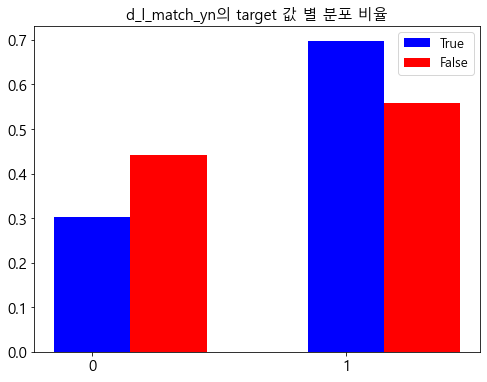

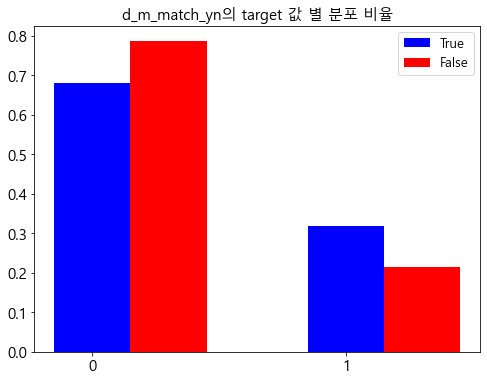

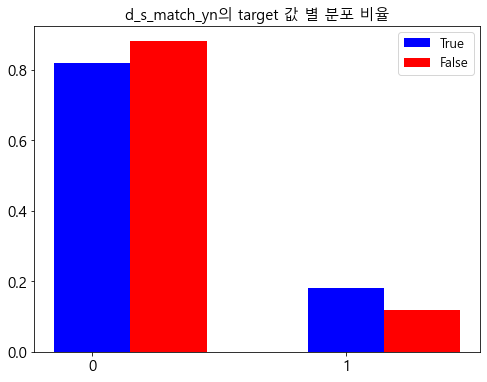

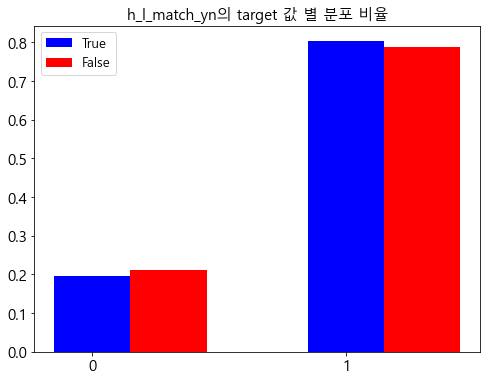

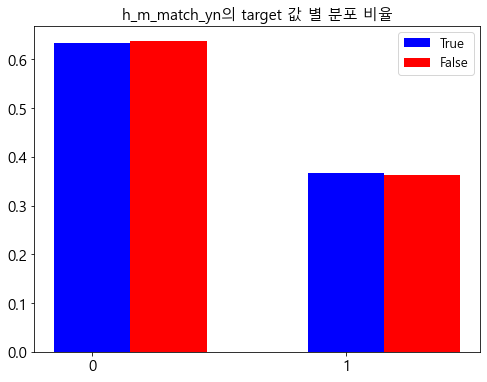

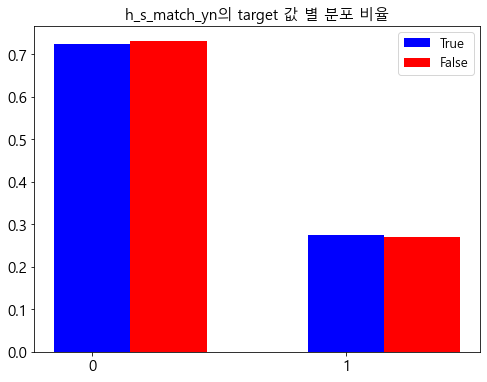

In [23]:
for col in tqdm(train_target_true.columns[:6]):

    x0_df = pd.DataFrame(train_target_false[col].unique())
    y0_df = pd.DataFrame(train_target_false[col].value_counts(normalize=True)).reset_index()
    false_total_df = pd.merge(x0_df, y0_df, left_on=0, right_on='index')
    
    x1_df = pd.DataFrame(train_target_true[col].unique())
    y1_df = pd.DataFrame(train_target_true[col].value_counts(normalize=True)).reset_index()
    true_total_df = pd.merge(x1_df, y1_df, left_on=0, right_on='index')

    x0 = false_total_df.iloc[:,1]
    y0 = false_total_df.iloc[:,2]

    x1 = true_total_df.iloc[:,1]
    y1 = true_total_df.iloc[:,2]

    plt.figure(figsize=(8,6))
    plt.title(f'{col}의 target 값 별 분포 비율', fontdict={'size':15})

    plt.xticks(x0, fontsize=15)
    plt.yticks(fontsize=15)

    plt.bar(x1, y1, color='blue', label='True', width=0.3)
    plt.bar(x0+0.3, y0, color='red', label='False', width=0.3)

    plt.legend(fontsize=13)

100%|██████████| 4/4 [00:00<00:00, 14.86it/s]


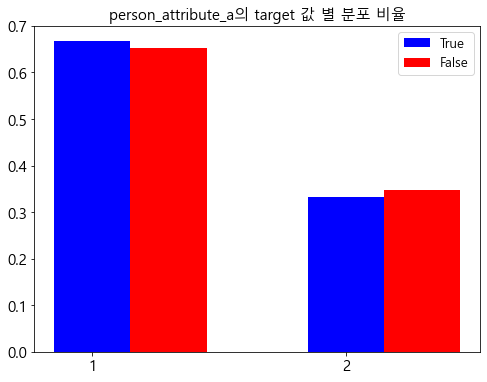

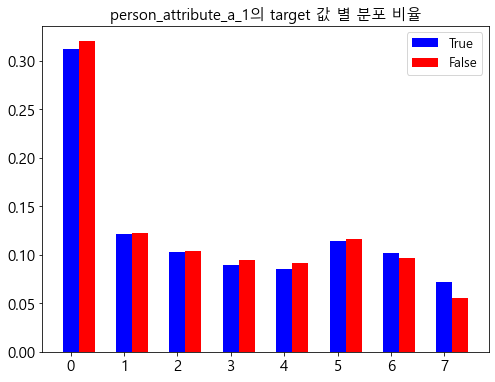

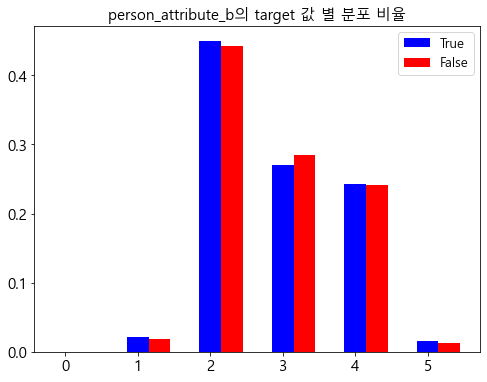

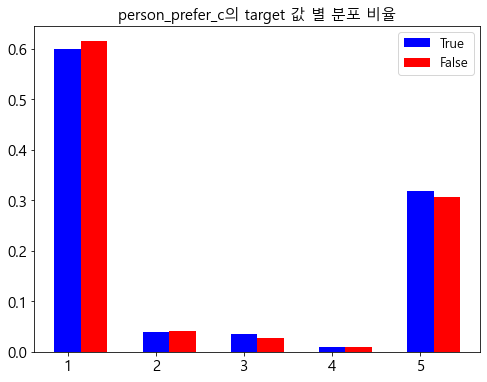

In [24]:
for col in tqdm(train_target_true.columns[6:10]):

    x0_df = pd.DataFrame(train_target_false[col].unique())
    y0_df = pd.DataFrame(train_target_false[col].value_counts(normalize=True)).reset_index()
    false_total_df = pd.merge(x0_df, y0_df, left_on=0, right_on='index')
    
    x1_df = pd.DataFrame(train_target_true[col].unique())
    y1_df = pd.DataFrame(train_target_true[col].value_counts(normalize=True)).reset_index()
    true_total_df = pd.merge(x1_df, y1_df, left_on=0, right_on='index')

    x0 = false_total_df.iloc[:,1]
    y0 = false_total_df.iloc[:,2]

    x1 = true_total_df.iloc[:,1]
    y1 = true_total_df.iloc[:,2]

    plt.figure(figsize=(8,6))
    plt.title(f'{col}의 target 값 별 분포 비율', fontdict={'size':15})

    plt.xticks(x0, fontsize=15)
    plt.yticks(fontsize=15)

    plt.bar(x1, y1, color='blue', label='True', width=0.3)
    plt.bar(x0+0.3, y0, color='red', label='False', width=0.3)

    plt.legend(fontsize=13)

100%|██████████| 1/1 [00:00<00:00, 12.08it/s]


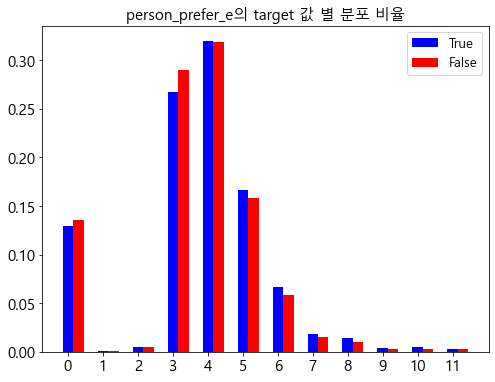

In [25]:
for col in tqdm(train_target_true.columns[13:14]):

    x0_df = pd.DataFrame(train_target_false[col].unique())
    y0_df = pd.DataFrame(train_target_false[col].value_counts(normalize=True)).reset_index()
    false_total_df = pd.merge(x0_df, y0_df, left_on=0, right_on='index')
    
    x1_df = pd.DataFrame(train_target_true[col].unique())
    y1_df = pd.DataFrame(train_target_true[col].value_counts(normalize=True)).reset_index()
    true_total_df = pd.merge(x1_df, y1_df, left_on=0, right_on='index')

    x0 = false_total_df.iloc[:,1]
    y0 = false_total_df.iloc[:,2]

    x1 = true_total_df.iloc[:,1]
    y1 = true_total_df.iloc[:,2]

    plt.figure(figsize=(8,6))
    plt.title(f'{col}의 target 값 별 분포 비율', fontdict={'size':15})

    plt.xticks(x0, fontsize=15)
    plt.yticks(fontsize=15)

    plt.bar(x1, y1, color='blue', label='True', width=0.3)
    plt.bar(x0+0.3, y0, color='red', label='False', width=0.3)

    plt.legend(fontsize=13)
# 24s

100%|██████████| 6/6 [00:00<00:00, 16.53it/s]


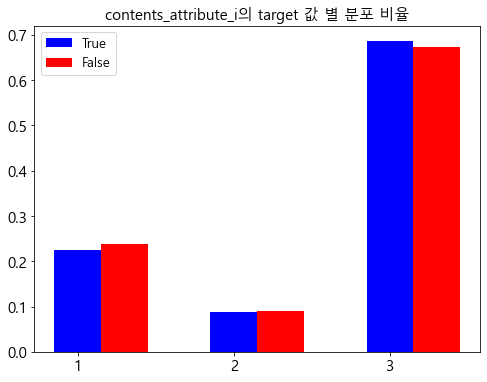

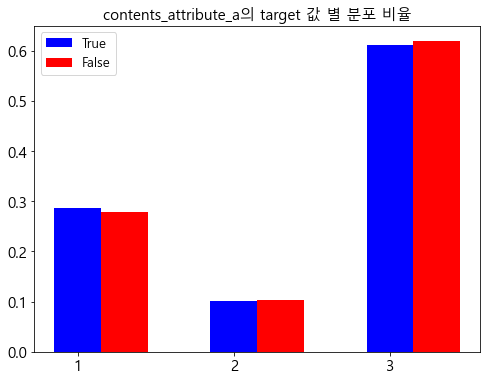

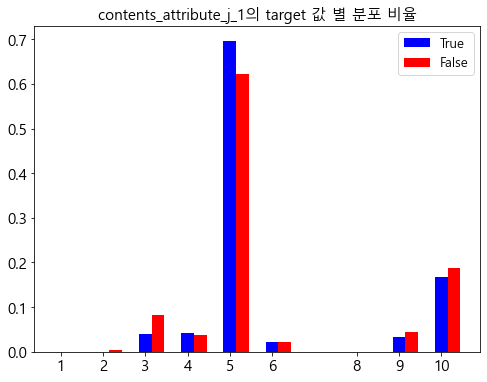

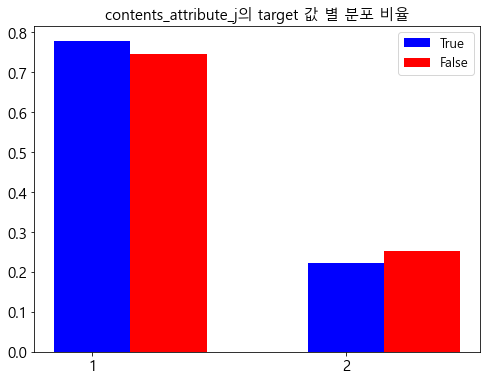

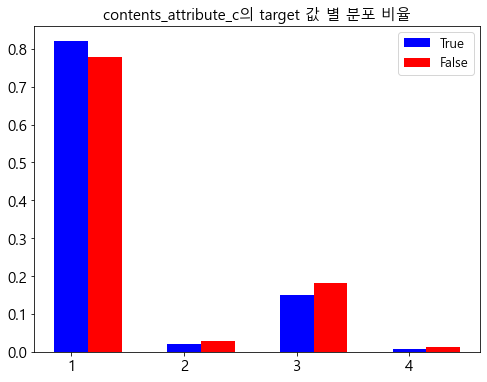

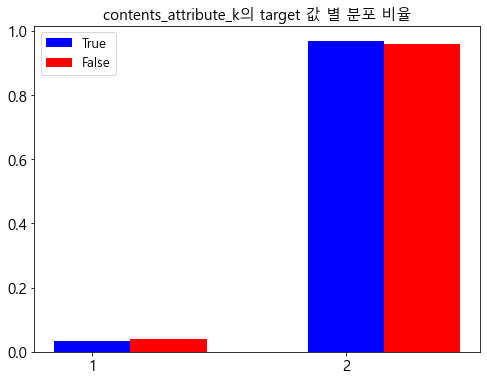

In [26]:
for col in tqdm(train_target_true.columns[17:23]):

    x0_df = pd.DataFrame(train_target_false[col].unique())
    y0_df = pd.DataFrame(train_target_false[col].value_counts(normalize=True)).reset_index()
    false_total_df = pd.merge(x0_df, y0_df, left_on=0, right_on='index')
    
    x1_df = pd.DataFrame(train_target_true[col].unique())
    y1_df = pd.DataFrame(train_target_true[col].value_counts(normalize=True)).reset_index()
    true_total_df = pd.merge(x1_df, y1_df, left_on=0, right_on='index')

    x0 = false_total_df.iloc[:,1]
    y0 = false_total_df.iloc[:,2]

    x1 = true_total_df.iloc[:,1]
    y1 = true_total_df.iloc[:,2]

    plt.figure(figsize=(8,6))
    plt.title(f'{col}의 target 값 별 분포 비율', fontdict={'size':15})

    plt.xticks(x0, fontsize=15)
    plt.yticks(fontsize=15)

    plt.bar(x1, y1, color='blue', label='True', width=0.3)
    plt.bar(x0+0.3, y0, color='red', label='False', width=0.3)

    plt.legend(fontsize=13)

100%|██████████| 2/2 [00:00<00:00, 16.04it/s]


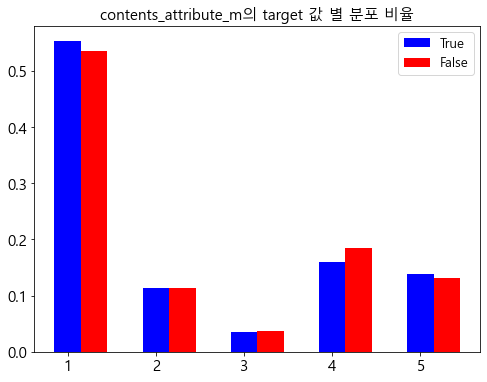

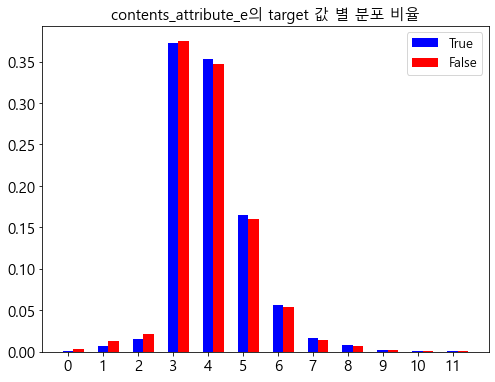

In [27]:
for col in tqdm(train_target_true.columns[25:27]):

    x0_df = pd.DataFrame(train_target_false[col].unique())
    y0_df = pd.DataFrame(train_target_false[col].value_counts(normalize=True)).reset_index()
    false_total_df = pd.merge(x0_df, y0_df, left_on=0, right_on='index')
    
    x1_df = pd.DataFrame(train_target_true[col].unique())
    y1_df = pd.DataFrame(train_target_true[col].value_counts(normalize=True)).reset_index()
    true_total_df = pd.merge(x1_df, y1_df, left_on=0, right_on='index')

    x0 = false_total_df.iloc[:,1]
    y0 = false_total_df.iloc[:,2]

    x1 = true_total_df.iloc[:,1]
    y1 = true_total_df.iloc[:,2]

    plt.figure(figsize=(8,6))
    plt.title(f'{col}의 target 값 별 분포 비율', fontdict={'size':15})

    plt.xticks(x0, fontsize=15)
    plt.yticks(fontsize=15)

    plt.bar(x1, y1, color='blue', label='True', width=0.3)
    plt.bar(x0+0.3, y0, color='red', label='False', width=0.3)

    plt.legend(fontsize=13)

# 회원과 컨텐츠 모두에게 존재하는 특성만 선택

In [28]:
# d_l_match_yn : True, False
# d_m_match_yn : True, False
# d_s_match_yn : True, False
# h_l_match_yn : True, False
# h_m_match_yn : True, False
# h_s_match_yn : True, False
# person_attribute_a : 2(1~2)
# person_attribute_a_1 : 8(0~7)
# person_prefer_c : 5(1~5)
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043
# person_prefer_e : 12(0~11)
# person_prefer_h_1 : 279
# person_prefer_h_2 : 279
# person_prefer_h_3 : 279
# contents_attribute_a : 3(1~3)
# contents_attribute_c : 4(1~4)
# contents_attribute_d : 1065
# contents_attribute_e : 12(0~11)
# contents_attribute_h : 250
# person_rn : 300177
# person_prefer_d_1_n : 433
# person_prefer_d_1_s : 137
# person_prefer_d_1_m : 36
# person_prefer_d_1_l : 11
# person_prefer_d_2_n : 435
# person_prefer_d_2_s : 137
# person_prefer_d_2_m : 36
# person_prefer_d_2_l : 11
# person_prefer_d_3_n : 420
# person_prefer_d_3_s : 136
# person_prefer_d_3_m : 36
# person_prefer_d_3_l : 11
# contents_attribute_d_n : 431
# contents_attribute_d_s : 137
# contents_attribute_d_m : 36
# contents_attribute_d_l : 11
# person_prefer_h_1_m : 246
# person_prefer_h_1_l : 19
# person_prefer_h_2_m : 246
# person_prefer_h_2_l : 19
# person_prefer_h_3_m : 246
# person_prefer_h_3_l : 19
# contents_attribute_h_m : 228
# contents_attribute_h_l : 17
# target : 2(0, 1)

In [29]:
# 제거된 특성(16개)
# 'id'
# 'contents_open_dt'
# person_attribute_b : 6(0~5)
# person_prefer_f : 1(1)
# person_prefer_g : 1(1)
# contents_attribute_i : 3(1~3)
# contents_attribute_j_1 : 9(1~10, 7제외)
# contents_attribute_j : 2(1~2)
# contents_attribute_k : 2(1~2)
# contents_attribute_l : 1752
# contents_attribute_m : 5(1~5)
# contents_rn : 283359
# contents_attribute_l_n : 736
# contents_attribute_l_s : 305
# contents_attribute_l_m : 79
# contents_attribute_l_l : 21

# 회원, 컨텐츠 둘다에 있는 특성 + 매칭연관 특성 선택

In [30]:
# d_l_match_yn : True, False
# d_m_match_yn : True, False
# d_s_match_yn : True, False
# h_l_match_yn : True, False
# h_m_match_yn : True, False
# h_s_match_yn : True, False
# person_attribute_a : 2(1~2)
# person_attribute_a_1 : 8(0~7)
# person_prefer_c : 5(1~5)
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043
# person_prefer_e : 12(0~11)
# person_prefer_h_1 : 279
# person_prefer_h_2 : 279
# person_prefer_h_3 : 279
# contents_attribute_i : 3(1~3)
# contents_attribute_a : 3(1~3)
# contents_attribute_j : 2(1~2)
# contents_attribute_j_1 : 9(1~10, 7제외)
# contents_attribute_c : 4(1~4)
# contents_attribute_l : 1752
# contents_attribute_d : 1065
# contents_attribute_m : 5(1~5)
# contents_attribute_e : 12(0~11)
# contents_attribute_h : 250
# person_prefer_d_1_n : 433
# person_prefer_d_1_l : 11
# contents_attribute_d_n : 431
# contents_attribute_d_l : 11
# person_prefer_h_1_m : 246
# person_prefer_h_1_l : 19
# contents_attribute_h_m : 228
# contents_attribute_h_l : 17
# person_rn : 300177
# target : 2(0, 1)

In [31]:
# 제거된 특성(27개)
# 'id'
# 'contents_open_dt'
# contents_rn
# person_prefer_f
# person_prefer_g
# person_attribute_b
# contents_attribute_k
# contents_attribute_l_n
# contents_attribute_l_s
# contents_attribute_l_m
# contents_attribute_l_l
# person_prefer_d_1_s
# person_prefer_d_1_m
# person_prefer_d_2_n
# person_prefer_d_2_s
# person_prefer_d_2_m
# person_prefer_d_2_l
# person_prefer_d_3_n
# person_prefer_d_3_s
# person_prefer_d_3_m
# person_prefer_d_3_l
# contents_attribute_d_s
# contents_attribute_d_m
# person_prefer_h_2_m
# person_prefer_h_2_l
# person_prefer_h_3_m
# person_prefer_h_3_l

## 히스토그램

In [32]:
train_target_true = train_target_true.astype(int)
train_target_false = train_target_false.astype(int)

100%|██████████| 57/57 [00:01<00:00, 31.61it/s]


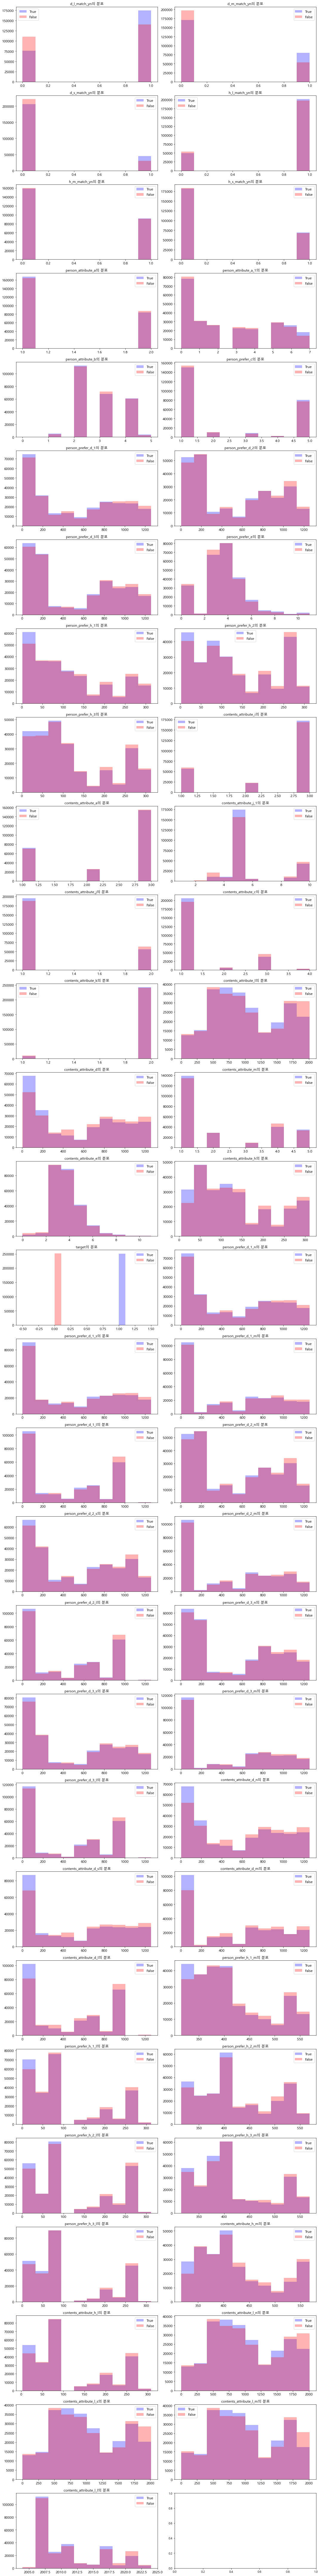

In [34]:
fig, axes = plt.subplots(29, 2, figsize=(15,120))
ax = axes.ravel()
i = 0
for col in tqdm(train_target_true.columns):

    x0 = train_target_false[col]
    x1 = train_target_true[col]

    ax[i].set_title(f'{col}의 분포')

    ax[i].tick_params(axis="x", labelsize=12) 
    ax[i].tick_params(axis="y", labelsize=12) 

    ax[i].hist(x1, color='blue', label='True', alpha=0.3)
    ax[i].hist(x0, color='red', label='False', alpha=0.3)

    ax[i].legend(fontsize=12)
    i += 1
plt.tight_layout()
# 14s

# 마지막 부분